# Bspline

### Pacchetti

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 62475 bytes to pyBspline.py


In [2]:
def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

# Dominio 1D

## Codominio 1D

### Funzioni di base

In [22]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=10 #base cardinality
xmin = 0.
xmax = 1.#N-P

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  10
knots             :  [0.    0.    0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.    1.
 1.   ]


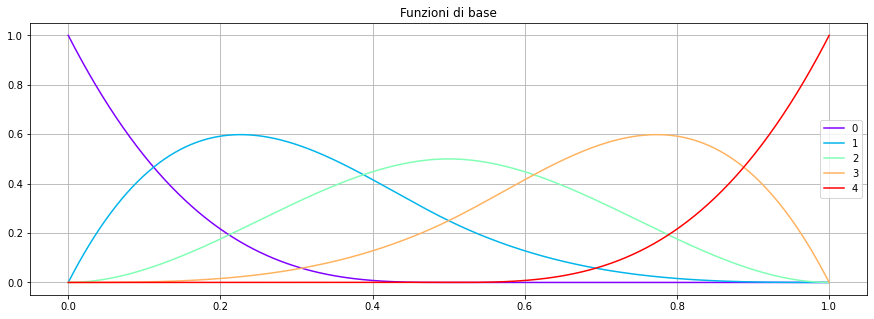

In [26]:
#grafico le funzioni di base
x = np.linspace(xmin,xmax,1000,endpoint=True)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)
    #print(bs._cp)
    
    
    y=bs.evaluate(x)
    
    plt.plot(x, y, color= next(colors),label=str(i))
    
plt.title("Funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

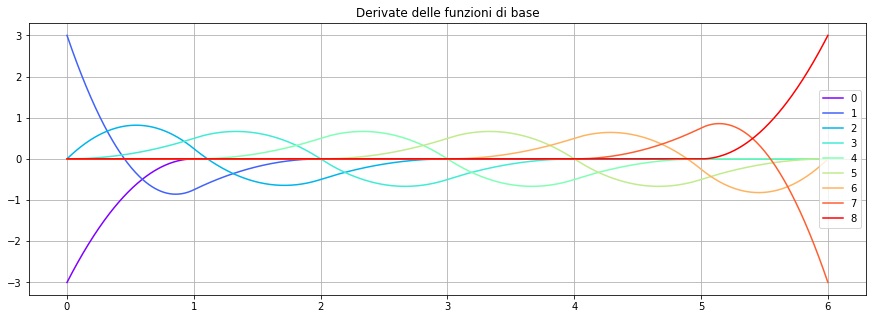

In [8]:
#grafico le funzioni derivate di base
#x = np.linspace(min(v)+0.1,max(v)-0.1,1000,endpoint=False)

#
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

f = lambda xx : np.asarray( bs.evaluate(xx) )

der = bs.derivative()

for i in range(0,N):
    
    #cancello i control points
    bs.clear_cp()
    
    #imposto i coefficienti
    bs.set_cp(i,1.0)

    #calcolo la derivata con l'algoritmo di deBoor
    der = bs.derivative()
    y   = der.evaluate(x)
    #y=bs.jacobian(x)
    
    #calcolo la derivata usando le differenze finite
    #y_diff = derivative(f, x, dx=1e-6)
    
    c = next(colors)
    plt.plot(x, y, color=c,label=str(i))
    #plt.plot(x, y_diff, color=c,linestyle="--")
    
plt.title("Derivate delle funzioni di base")
plt.legend()
plt.grid(True)
plt.show()

## Approssimazione: 1D $\rightarrow$ 1D

In [23]:
#definisco la dimensionaità:
sh = Bs.shape(1,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=8 #base caridnality
xmin = -1.
xmax = 1.

kv =  Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  8
knots             :  [-1.         -1.         -1.         -0.66666667 -0.33333333  0.
  0.33333333  0.66666667  1.          1.          1.        ]


In [24]:
#function
def func(x):
    return np.sin(2*np.pi*x/5).astype(float) #+ np.power(x,5.0)#np.full(len(x),1.0)     

def func(x):
    t = np.power(x,2)
    return t.reshape((len(t),))

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [25]:
#fitting_Bspline
def fitting_Bspline(x,*par):
    #bs.clear_cp()
    for i in range(len(par)):
        bs.set_cp(i,par[i])
    return bs.evaluate(x)        

In [26]:
#x,y
x = np.linspace(xmin,xmax,100,endpoint=True)
y = func(x)

In [27]:
#fit
p0 = list ( np.zeros(N))
popt,pcov = curve_fit(fitting_Bspline,x,y,p0=p0)
#print(popt)

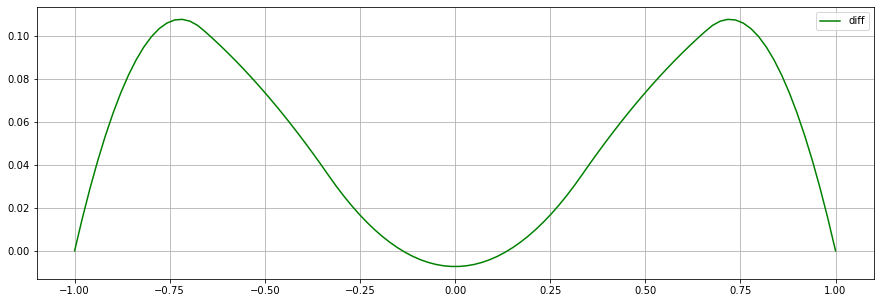

In [31]:
#grafico
plt.figure ( 0 , figsize = ( 15 , 5 ) )
colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

bs.approximate(func)
yb = bs.evaluate(x)
yf = func(x)

for i in range(len(popt)):
    bs.set_cp(i,popt[i])
yfit = bs.evaluate(x)
    
#plt.plot(x, yf  , color= "red"   , label="function")
#plt.plot(x, yb  , color= "blue"  ,label="Bspline")

plt.plot(x, yb-yf  , color= "green"  ,label="diff")

#plt.plot(x, yfit, color= "green" , label="fit")
    
plt.legend()
plt.grid(True)
plt.show()

## Codominio 2D

### Curva in 2D

In [8]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])


polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [9]:
#function
def func(t):
    #print(cpz)
    a = 20
    cpx = t#np.random.rand(N)
    cpy = np.cos(a*t)/2.0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [10]:
#approximate
cp = bs.approximate(func,opts={"N":[100]})
cpx = cp[0]
cpy = cp[1]

load vector
gDnp


In [11]:
#xy
NN = 1000
t= np.linspace(xmin,xmax,NN)

#
xy   = bs.evaluate(t)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

#
xy = func(t)
df0 = pd.DataFrame(xy)
df0 = df0.rename(columns={0:"x",1:"y"})

index = 800
der = bs.derivative()
arrow = der.evaluate(t[index])

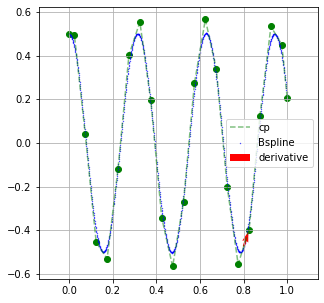

In [12]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.scatter(df["x"], df["y"], color= "blue",label="Bspline",s=0.1)
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
plt.quiver( *list(df.iloc[index]) , *arrow ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

## Codominio 3D

### Curva in 3D

In [13]:
#definisco la dimensionaità:
sh = Bs.shape(1,3)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=22 #base caridnality
#
xmin = 0.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(0,1,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv])
#bs.show()

polinomial degree :  2
base caridnality  :  22
knots             :  [0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55
 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.   1.  ]


In [14]:
#func
def func(t):
    cpz = t#np.random.rand(N)
    #print(cpz)
    a = 20
    cpx = np.sin(a*t)#np.random.rand(N)
    cpy = np.cos(a*t)#np.random.rand(N)
    out = np.zeros(shape=(len(t),3))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
        out[i,2] = cpz[i]
    return out

In [15]:
#approximate
cp = bs.approximate(func,opts={"N":[100]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]
#cp

In [16]:
#xy
NN = 1000
t = np.linspace(0.,1.,NN,endpoint=False)

In [17]:
#
xyz = func(t)
df0 = pd.DataFrame(xyz)
df0 = df0.rename(columns={0:"x",1:"y",2:"z"})
df0["x0"] = t
#df0

In [18]:
#
xyz = bs.evaluate(t)
df = pd.DataFrame(xyz)
df = df.rename(columns={0:"x",1:"y",2:"z"})
#df["x0"] = t
#df
index = 100
der = bs.derivative()
arrow = der.evaluate(t[index])

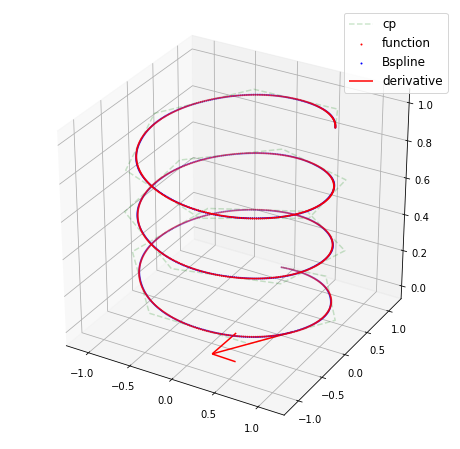

In [19]:
#grafico
fig = plt.figure ( 0 , figsize=(8,8) )    
ax = fig.gca(projection='3d')
#ax.set_aspect('equal')
#plt.plot(pyx, pyy, pyz)

#converto in dataframe    
X = [df.loc[N,"x"] ,df.loc[N,"y"] , df.loc[N,"z"]]
ax.plot(cpx,cpy,cpz,color="green",label="cp",linestyle="--",alpha=0.2)
#ax.scatter(cpx,cpy,cpz,color="green",marker='o')
ax.scatter(df0["x"],df0["y"],df0["z"], color= "red",label="function",s=1)
ax.scatter(df["x"], df["y"],df["z"], color= "blue",label="Bspline",s=1)
plt.quiver( *list(df.iloc[index]) , *arrow  , \
               normalize=True,label="derivative",color="red")

plt.legend(fontsize=12)
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
#plt.axis('equal')
#set_axes_equal(ax)
plt.show()

# Dominio 2D

## Codominio 1D

### Funzioni di base in 2D

In [20]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
N = 3

xmin = 0.0
xmax = 5.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0.  0.  2.5 5.  5. ]


In [21]:
#grafico le funzioni di base
Nx = 40
Ny = 40
x = np.linspace(xmin,xmax,Nx,endpoint=False)
y = np.linspace(xmin,xmax,Ny,endpoint=False)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

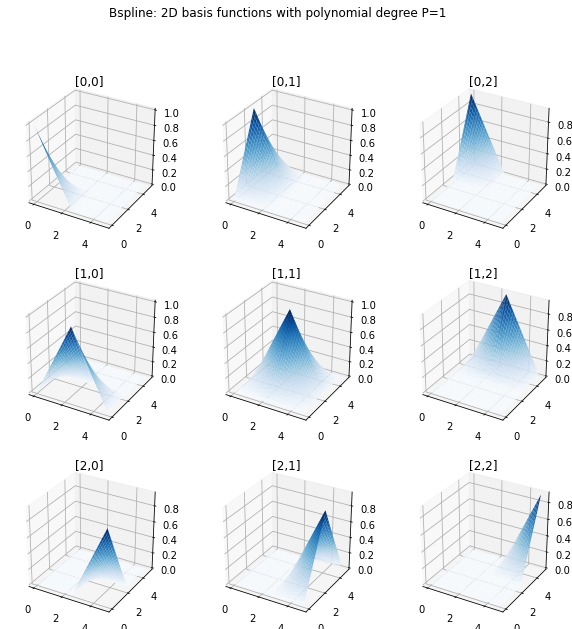

In [22]:
#%matplotlib widget

#
L  = 0#
R  = N
NP = N

#
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

#x = np.linspace(min(v)+0.1,max(v)-0.1,100)
#print("x : ",x)

treD = True

k=1
for i in range(L,R):
    for j in range(L,R):
        #print(k)
        if treD == True :
            ax = fig.add_subplot(NP, NP, k, projection='3d')
        else :
            ax = fig.add_subplot(NP, NP, k)#, projection='3d')
        k=k+1
        
        #
        bs.clear_cp()
        bs.set_cp([i,j],1.0)
        #
        z=bs.evaluate(XY) 
        Z=z.reshape(Nx,Ny)
        #        
        if treD == True :
            ax.plot_surface(X, Y, Z, cmap='Blues')
        else :
            ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
        
        title = "[%d,%d]"%(i,j)
        ax.set_title(title)
        #plt.axis('equal')
        #ax.set_zlim(0,1.2)
        #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [27]:
#%matplotlib widget
i = 1
j = 1

#
bs.clear_cp()
bs.set_cp([i,j],1.0)
#
z=bs.evaluate(XY) 
Z=z.reshape(Nx,Ny)
#        
der = bs.derivative()
vx = der[0].evaluate(XY)#.reshape((Nx,Ny))
vy = der[1].evaluate(XY)#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

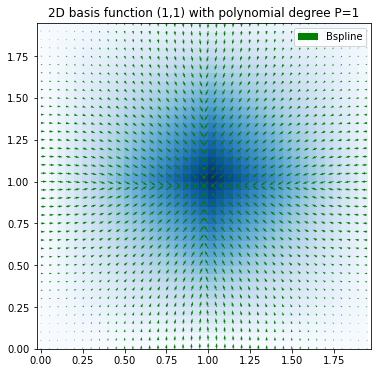

In [28]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )

#
plt.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")
plt.quiver(XY[:,0],XY[:,1],vx,vy,color="green",label="Bspline")
plt.axis('equal')
plt.legend()
plt.title("2D basis function (%d,%d) with polynomial degree P=%d" %(i,j,P) )
plt.show()

## Codominio 3D

### Sphere

In [39]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=10 #base caridnality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=6 #base caridnality
vmin = 0#-1
vmax = np.pi#1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [30]:
#sfera
def Sphere(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = np.sin(v)*np.cos(u)#(1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = np.sin(v)*np.sin(u)#(1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = np.cos(v)#v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [31]:
#approximate
cp = bs.approximate(Sphere,opts={"N":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [32]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Sphere(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [33]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

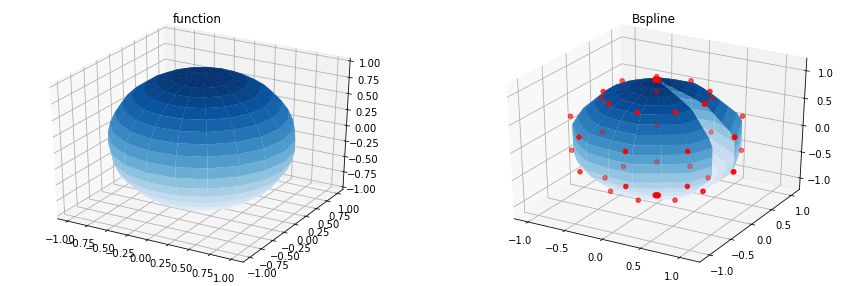

In [34]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
set_axes_equal(ax)
#plt.axis('equal')
plt.show()

### Moebius

In [59]:
#definisco la dimensionaità:
sh = Bs.shape(2,3)
#sh.show()

#defiisco i knot vector

#x
Px=1 #polinomial degree
Nx=20 #base cardinality
umin = 0
umax = 2*np.pi

#y
Py=1 #polinomial degree
Ny=5 #base caridnality
vmin = -1
vmax = 1

#
kvx = Bs.uniform_open_kv(umin,umax,p=Px,n=Nx)#Bs.knot_vector(Px,Nx,ux)
#kvx.show()

#
kvy = Bs.uniform_open_kv(vmin,vmax,p=Py,n=Ny)#Bs.knot_vector(Py,Ny,vy)
#kvy.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kvx,kvy])
#bs.show()

In [60]:
#Moebius
def Moebius(uv):
    u = uv[:,0]
    v = uv[:,1]
    x = (1.+v/2.0*np.cos(u/2.))*np.cos(u)
    y = (1.+v/2.0*np.cos(u/2.))*np.sin(u)
    z = v/2.0*np.sin(u/2.)
    return np.asarray([x,y,z]).transpose()

In [61]:
#approximate
cp = bs.approximate(Moebius,opts={"N":[10,5]})
cpx = cp[0]
cpy = cp[1]
cpz = cp[2]

In [62]:
#x,y
Nx = 20
Ny = 20
u = np.linspace(umin,umax,Nx,endpoint=True)
v = np.linspace(vmin,vmax,Ny,endpoint=True)
X, Y = np.meshgrid(u, v)
uv = np.zeros((Nx*Ny,2))
uv[:,0] = X.reshape((Nx*Ny,))
uv[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = Moebius(uv)
XMob = z[:,0].reshape(Nx,Ny)
YMob = z[:,1].reshape(Nx,Ny)
ZMob = z[:,2].reshape(Nx,Ny)

In [63]:
#control points
#bs = set_cp(bs,popt)
zF = bs.evaluate(uv)
XFitMob = zF[:,0].reshape(Nx,Ny)
YFitMob = zF[:,1].reshape(Nx,Ny)
ZFitMob = zF[:,2].reshape(Nx,Ny)

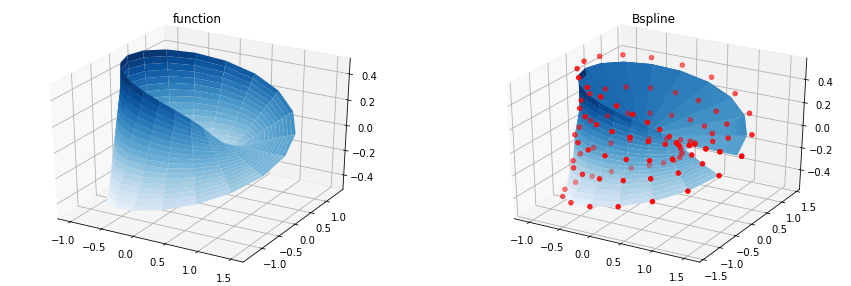

In [64]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )


ax = fig.add_subplot(121 , projection='3d')  
ax.plot_surface(XMob, YMob, ZMob, cmap='Blues')
ax.set_title("function")
#set_axes_equal(ax)

ax = fig.add_subplot(122 , projection='3d')      
ax.plot_surface(XFitMob, YFitMob, ZFitMob, cmap='Blues')
#ax.plot(cpx,cpy,cpz,color="red",label="cp",linestyle="--")
ax.scatter(cpx,cpy,cpz,color="red",marker='o')
ax.set_title("Bspline")
#set_axes_equal(ax)
#plt.axis('equal')
plt.show()

## Approssimazione: 2D $\rightarrow$  1D

In [24]:
#definisco la dimensionaità:
sh = Bs.shape(2,1)
#sh.show()

#defiisco i knot vector
P=2 #polinomial degree
N=14 #base caridnality
xmin = -1.
xmax = 1.

kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv,kv])
#bs.show()

polinomial degree :  2
base caridnality  :  14
knots             :  [-1.         -1.         -1.         -0.83333333 -0.66666667 -0.5
 -0.33333333 -0.16666667  0.          0.16666667  0.33333333  0.5
  0.66666667  0.83333333  1.          1.          1.        ]


In [42]:
#funzione
def func(xy):
    #(x, y) = xy
    return np.cos(2*np.pi*xy[:,0]) + np.sin(2*np.pi*xy[:,1]) #+ np.power(x,5.0)#np.full(len(x),1.0) 

def func(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out

#cp = bs.approximate(func)#,opts={"norm":"L1"})
#lv = bs.load_vector(func)
#om = bs.overlap_matrix()

In [43]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

In [44]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])
z = func(XY)
Z = z.reshape(Nx,Ny)

In [32]:
# fit
p0 = list ( np.zeros(N**2))
popt,pcov = curve_fit(fitting_Bspline,XY,z,p0=p0)
#print(popt)
# control points
for i,j in zip(il,range(len(popt))):
        bs.set_cp(i,popt[j])
zF = bs.evaluate(XY)
ZF=zF.reshape(Nx,Ny)

In [45]:
# approssimazione
READ = False
file = "files/om-2d-1d-P="+str(P)+"-N="+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("om",file)
cp = bs.approximate(func)
bs.save("om",file)
zB = bs.evaluate(XY)
ZB=zB.reshape(Nx,Ny)

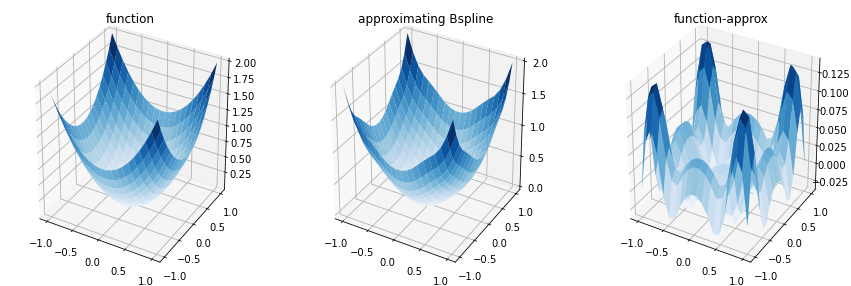

In [46]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(131 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues')
ax.set_title("function")

ax = fig.add_subplot(132 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues')
ax.set_title("approximating Bspline")
#ax.scatter(X,Y,cp,color="red",marker='o')

ax = fig.add_subplot(133 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap= 'Blues')#cmap='RdBu_r')
ax.set_title("function-approx")

#ax = fig.add_subplot(133 , projection='3d')      
#ax.plot_surface(X, Y, ZF, cmap='Blues')
#ax.set_title("fit")

plt.show()

# Dominio 3D

## Codominio 1D

### Funzioni di base

In [50]:
#definisco la dimensionaità:
sh = Bs.shape(3, 1)
#sh.show()

#defiisco i knot vector
P = 1  #polinomial degree
#N0 = 4
N = 3  #base caridnality
#
xmin = 0.0
xmax = 2.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv,kv])
#bs.show()

polinomial degree :  1
base caridnality  :  3
knots             :  [0. 0. 1. 2. 2.]


In [51]:
#grafico le funzioni di base
Nx = 10
Ny = 10
Nz = 10
Nxyz  = Nx*Ny*Nz
x = np.linspace(min(v),max(v),Nx,endpoint=True)
y = np.linspace(min(v),max(v),Ny,endpoint=True)
z = np.linspace(min(v),max(v),Nz,endpoint=True)
X, Y , Z = np.meshgrid(x, y, z)
XYZ = np.zeros((Nxyz,3))
XYZ[:,0] = X.reshape((Nxyz,))
XYZ[:,1] = Y.reshape((Nxyz,))
XYZ[:,2] = Z.reshape((Nxyz,))
#XY = pd.DataFrame({"x":X.reshape((Nx*Ny,1)), "y":Y.reshape((Nx*Ny,1))})

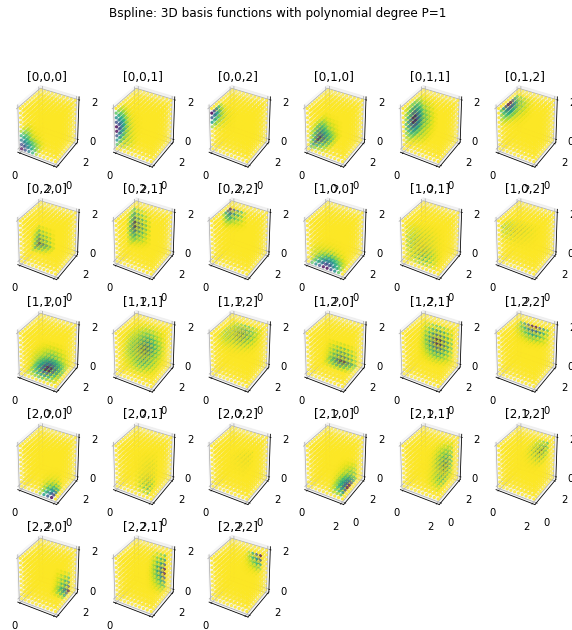

In [52]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 10 , 10 ) )
fig.suptitle("Bspline: 3D basis functions with polynomial degree P=" + str(P), fontsize=12 )
#colors = iter(cm.rainbow(np.linspace(0, 1,N)))

cmap = plt.get_cmap('viridis_r')

k=1
for i in range(0,N):
    for j in range(0,N):
        for w in range(0,N):
            #print(k)
            ax = fig.add_subplot(5,6,k, projection='3d')
            k=k+1

            #
            bs.clear_cp()
            bs.set_cp([i,j,w],1.0)
            #
            t=bs.evaluate(XYZ) 
           
            #
            norm = Normalize(vmin=min(t), vmax=max(t))
            ax.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
            title = "[%d,%d,%d]"%(i,j,w)
            ax.set_title(title)
            #        
            #ax.pcolormesh(X, Y, Z, cmap='Blues')#,rstride=1, cstride=1)
            #plt.axis('equal')
            #ax.set_zlim(0,1.2)
            #set_axes_equal(ax)
    
#plt.title("Funzioni di base")
#plt.legend()
#plt.grid(True)
plt.show()

### Gradiente

In [50]:
#%matplotlib widget
i = 0
j = 0
k = 0

#
bs.clear_cp()
bs.set_cp([i,j,k],1.0)
#
t=bs.evaluate(XYZ) 
Z=t.reshape(Nx,Ny,Nz)
#        
normalize = 10 
der = bs.derivative()
vx = der[0].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vy = der[1].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
vz = der[2].evaluate(XYZ)/normalize#.reshape((Nx,Ny))
#zd  = der.evaluate(XY)

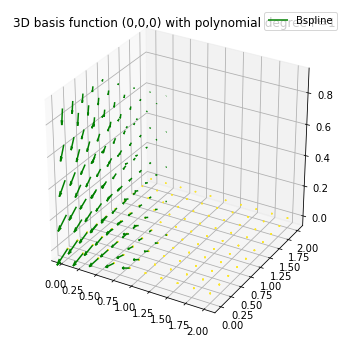

In [51]:
#%matplotlib inline
fig = plt.figure ( 0 , figsize = ( 6 , 6 ) )
ax = fig.add_subplot(111, projection='3d')
#
t=bs.evaluate(XYZ)            
#
norm = Normalize(vmin=min(t), vmax=max(t))
plt.scatter(XYZ[:,0],XYZ[:,1],XYZ[:,2],color=cmap(norm(t)),marker=".")
plt.quiver(XYZ[:,0],XYZ[:,1],XYZ[:,2],vx,vy,vz,color="green",label="Bspline")
#ax.pcolormesh(X, Y, Z, cmap='Blues',label="function")#,rstride=1, cstride=1)
#plt.quiver(X,Y,g[0],g[1],color="red",label="fd")
#plt.quiver(XY[:,0],XY[:,1],gx,gy,color="red",label="fd")

#plt.axis('equal')
plt.legend()
plt.title("3D basis function (%d,%d,%d) with polynomial degree P=%d" %(i,j,k,P) )
plt.show()

# Galerkin Method

In [2]:
READ = True

#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

#defiisco i knot vector
P = 2  #polinomial degree
N = 14

xmin = -1.0
xmax = 1.0

#
kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
#kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh, [kv,kv])
#bs.show()

N_Galerkin = 2 
N_approximate = 2

In [3]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

In [4]:
#fitting_Bspline
il = bs.index_list()

def fitting_Bspline(xy,*par):
    #bs.clear_cp()
    #(x, y) = xy
    for i,j in zip(il,range(len(par))):
        bs.set_cp(i,par[j])
    return bs.evaluate(xy)        

## Dominio 2D - esempio 1

In [5]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [6]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("sm",file) 
cp = bs.Galerkin(func,gD,opts={"interpolation":False})
#,opts={"N":[N_Galerkin,N_Galerkin]})

In [7]:
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [8]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("om",file)
cp = bs.approximate(gD,opts={"interpolation":False})
#,opts={"N":[N_approximate,N_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [9]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

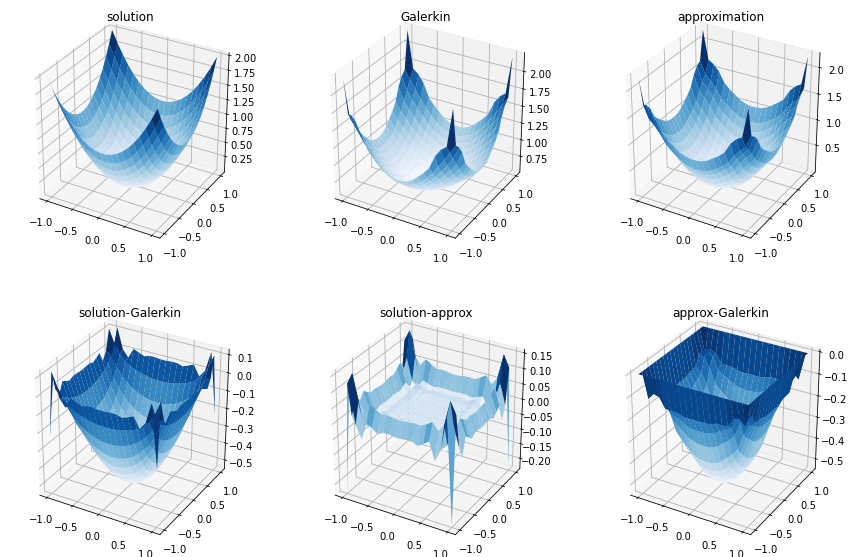

In [10]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

In [83]:
print(min(Z.ravel()))
print(min(ZB.ravel()))

0.0055401662049861375
0.5224820289577274


## Dominio 2D - esempio 2

In [11]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    out = np.cos(x) + np.cos(y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    out = - np.cos(x) - np.cos(y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [12]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("sm",file)
cp = bs.Galerkin(func,gD)#,opts={"N":[N_Galerkin,N_Galerkin]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [13]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("om",file)
cp = bs.approximate(gD)#,opts={"N":[N_approximate,N_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [36]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

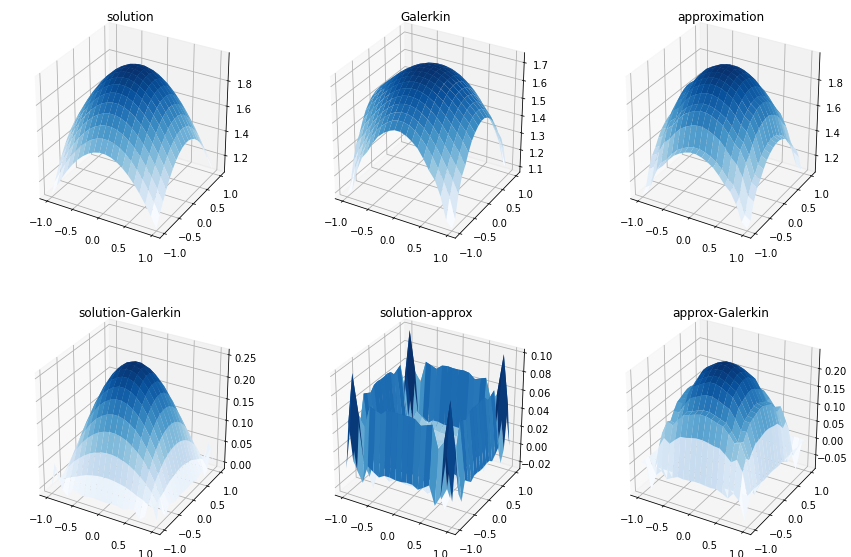

In [37]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

###############################################

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

###############################################

plt.show()

## Dominio 2D - esempio 3

In [89]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    #out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    out = x**2 + y**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    out = np.full(shape=(len(x),1),fill_value=4)
    return -out

In [90]:
#Galerkin
file = "test/stiffness_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("sm",file)
cp = bs.Galerkin(func,gD)#,opts={"N":[N_Galerkin,N_Galerkin]})
zb = bs.evaluate(XY)
ZB = zb.reshape(Nx,Ny)

In [91]:
#approximate
file = "test/overlap_matrix-"+str(P)+"/"+str(N)+".csv"
if os.path.exists(file) == True and READ == True:
    bs.load("om",file)
cp = bs.approximate(gD)#,opts={"N":[N_approximate,N_approximate]})
za = bs.evaluate(XY)
ZA = za.reshape(Nx,Ny)

In [92]:
#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

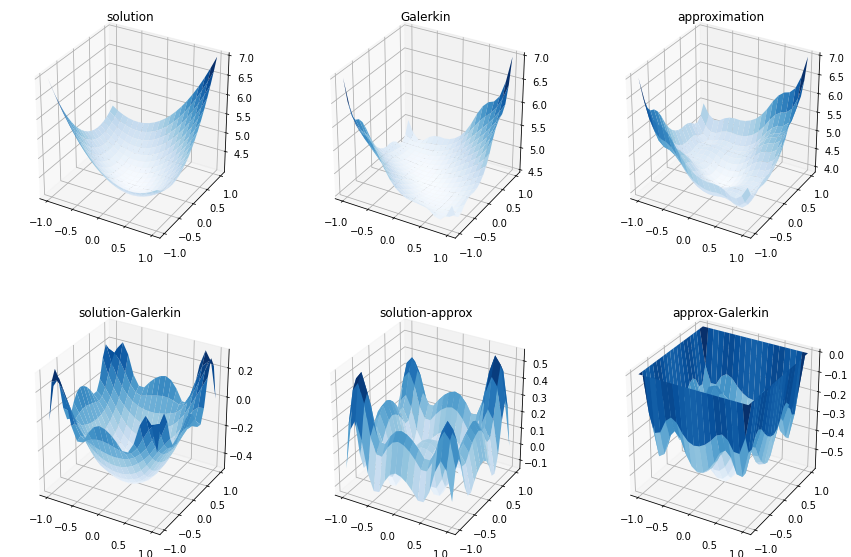

In [93]:
#%matplotlib widget
fig = plt.figure ( 0 , figsize = ( 15 , 10 ) )
#fig.suptitle("Bspline: 2D basis functions with polynomial degree P=" + str(P), fontsize=12 )

ax = fig.add_subplot(231 , projection='3d')  
ax.plot_surface(X, Y, Z, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("solution")

ax = fig.add_subplot(232 , projection='3d')      
ax.plot_surface(X, Y, ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeB,yedgeB,zedgeB,".",c="red")
#ax.plot3D(xedgeB,yedgeB,z2edgeB,".",c="green")
ax.set_title("Galerkin")

ax = fig.add_subplot(233 , projection='3d')      
ax.plot_surface(X, Y, ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approximation")

###############################################

ax = fig.add_subplot(234 , projection='3d')      
ax.plot_surface(X, Y, Z-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-Galerkin")

ax = fig.add_subplot(235 , projection='3d')      
ax.plot_surface(X, Y, Z-ZA, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("solution-approx")

ax = fig.add_subplot(236 , projection='3d')      
ax.plot_surface(X, Y, ZA-ZB, cmap='Blues',alpha=1)
#ax.plot3D(xedgeA,yedgeA,zedgeA,".",c="red")
#ax.plot3D(xedgeA,yedgeA,z2edgeA,".",c="green")
ax.set_title("approx-Galerkin")

plt.show()

# Test

In [3]:
test_dir = "test/"

In [4]:
#definisco la dimensionaità:
sh = Bs.shape(2, 1)
#sh.show()

xmin = -1.0
xmax = 1.0

N_Galerkin = 2 
N_approximate = 2

In [5]:
def gD(xx): # soluzione
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    #out = x + y 
    out = np.power(x,2) + np.power(y,2) #np.full(4,len(x))
    #out = np.cos(5*x) - np.sin(5*y)
    #out = x**2 + x*y + 4
    return out
    
def func(xx): # - Laplaciano
    xx = np.asarray(xx)
    x = xx[:,0]
    y = xx[:,1]
    out = np.full(shape=(len(x),1),fill_value=4.0)
    #out = - 25*np.cos(5*x) + 25*np.sin(5*y)
    #out = np.full(shape=(len(x),1),fill_value=0)
    return -out

In [10]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

## Stiffness matrix

In [99]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = False

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]


for P in PP :
    for N in NN:

        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
        #bs.show()

        sm = bs.stiffness_matrix()

        file = test_dir+"stiffness_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("sm",file)

        #sm.to_csv(file)
print("Finished")

Finished


## Overlap matrix

In [100]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]


for P in PP :
    for N in NN:

        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
        #bs.show()

        ov = bs.overlap_matrix()

        file = test_dir+"overlap_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("om",file)

        #sm.to_csv(file)
print("Finished")

Finished


## Galerkin

In [8]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        #kv.show()

        #alloco la Bspline
        bs = Bs.Bspline(sh, [kv,kv])
    
        #bs.show()
        
        infile = test_dir+"stiffness_matrix-"+ str(P)+"/"+str(N)+".csv"
        
        bs.load("sm",infile)
                
        #Galerkin
        cp = bs.Galerkin(func,gD,opts={"N":[N_Galerkin,N_Galerkin]})
        
        outfile = test_dir+"solution-"+ str(P)+"/"+str(N)+".csv"
        
        bs.save("cp",outfile)
        #cp.to_csv(outfile,index_label="index")
        
        lvfile = test_dir+"load_vector-"+ str(P)+"/"+str(N)+".csv"
        
        #bs.save("lv",lvfile)
        

print("Finished")

Finished


## Evaluate

In [11]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue

        #
        kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P, N, v)
        bs = Bs.Bspline(sh, [kv,kv])
        
        solfile = test_dir+"solution-"+ str(P)+"/"+str(N)+".csv"  
        
        bs.load("cp",solfile)
        #bs._cp = pd.read_csv(solfile,index_label="index")
        
        
        zb = bs.evaluate(XY)
        ZB = zb.reshape(Nx,Ny)
        
        
        outfile = test_dir+"evaluate-"+ str(P)+"/"+str(N)#+".txt"    
        
        np.save(outfile,ZB)
        
        
print("Finished")

Finished


## Lebesgue

In [12]:
#x,y
Nx = 20
Ny = 20
x = np.linspace(xmin,xmax,Nx,endpoint=True)
y = np.linspace(xmin,xmax,Ny,endpoint=True)
X, Y = np.meshgrid(x, y)
XY = np.zeros((Nx*Ny,2))
XY[:,0] = X.reshape((Nx*Ny,))
XY[:,1] = Y.reshape((Nx*Ny,))
#tup = (XY[:,0],XY[:,1])

#solution
z = gD(XY)
Z = z.reshape(Nx,Ny)

In [13]:
#defiisco i knot vector
#P = 2  #polinomial degree

RUN = True

NN = list(np.arange(4,15)) #+ list(10*np.arange(2,11))
PP = [1,2,3]

Lebesgue = pd.DataFrame(index = NN,columns=PP)

for P in PP :
    for N in NN:        
        
        print(N,end="\r")
        
        if RUN == False :
            continue
               
        #
        infile = test_dir+"evaluate-"+ str(P)+"/"+str(N)+".npy"            
        ZB = np.load(infile)
        
        #
        diff = Z - ZB
        
        norm = np.sqrt(np.mean(np.power(diff,2)))
        
        Lebesgue.at[N,P] = norm
        
print("Finished")

Finished


In [14]:
Lebesgue

,1,2,3
4,0.669376,0.667848,0.617522
5,0.698266,0.714517,3.70992e+14
6,0.719947,0.735846,0.739495
7,0.736362,0.753294,0.759058
8,0.747995,0.765244,0.771981
9,0.757096,0.774287,0.82453
10,0.767879,0.78179,0.78925
11,0.775137,0.78768,0.80538
12,0.777915,0.79177,0.800383
13,0.781037,0.795583,0.804336


- ho dei grossi problemi negli spigoli
- devo capire come approssimare bene le funzioni sui bordi
- provare ad usare una funzione di ottimizzazione di Python

# Periodic Bspline

In [1]:
import pyBspline as Bs
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import scipy
from scipy.misc import derivative
from scipy.optimize import curve_fit
import pandas as pd
#from ipywidgets import interactive
#import ipywidgets as widgets
#from ipywidgets import AppLayout, FloatSlider
#from mpl_toolkits.mplot3d import Axes3D
import copy
import pandas as pd
#from scipy import integrate
#import itertools 
#import time
import os
import scipy.special

[NbConvertApp] Converting notebook pyBspline.ipynb to script
[NbConvertApp] Writing 67080 bytes to pyBspline.py


In [2]:
#definisco la dimensionaità:
sh = Bs.shape(1,2)
#sh.show()

#defiisco i knot vector
P=1 #polinomial degree
N=10 #base caridnality
xmin = 0.0
xmax = 1.0

#
#kv = Bs.uniform_open_kv(xmin,xmax,p=P,n=N)#Bs.knot_vector(P,N,v)
#kv = periodic_kv(xmin,xmax,p=P,n=N)
kv = Bs.periodic_kv(xmin,xmax,p=P,n=N)
kv.show()

#alloco la Bspline
bs = Bs.Bspline(sh,[kv],periodic=[True])

polinomial degree :  1
base caridnality  :  11
knots             :  [-0.1  0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1]


In [3]:
#function
x0 = 0.0
y0 = 0.0
a = 1.0
b = 1.0
def func(t):
    #print(cpz)
    cpx = a*np.cos(2*np.pi*t)+x0#np.random.rand(N)
    cpy = b*np.sin(2*np.pi*t)+y0#np.random.rand(N)
    out = np.zeros(shape=(len(t),2))
    for i in range(len(t)):
        out[i,0] = cpx[i]
        out[i,1] = cpy[i]
    return out

In [4]:
t = np.linspace(0,1,N)
cp = func(t)
for i in range(len(t)):
    #bs._cp[i] = cp[i]
    bs.set_cp(i,cp[i])
cpx = cp[:,0]
cpy = cp[:,1]

In [5]:
#bs.control_points()

In [6]:
#bs.periodicity()

In [7]:
#
NN = 1000
T = np.linspace(xmin,xmax,NN,endpoint=True)
xy   = bs.evaluate(T)
df = pd.DataFrame(xy)
df = df.rename(columns={0:"x",1:"y"})

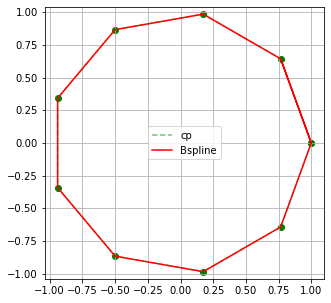

In [8]:
#grafico
plt.figure ( 0 , figsize = ( 5 , 5 ) )
   
#converto in dataframe    
plt.plot(cpx,cpy,color="green",label="cp",linestyle="--",alpha=0.5)
plt.scatter(cpx,cpy,color="green")
plt.plot(df["x"], df["y"], color= "red",label="Bspline")
#plt.scatter(df0["x"], df0["y"], color= "red",label="function",s=0.1)
#plt.quiver( xy[index] , arrow[index] ,label="derivative",color="red")
plt.legend()
plt.grid(True)
#plt.xlim(0.0,0.5)
#plt.ylim(0.0,0.5)
#aATTENZIONE: questo è fondamentale per vedere che la derivata è tangente alla cruva
plt.axis('equal')
plt.show()

In [9]:
der = bs.derivative()
arrow = der.evaluate(T)

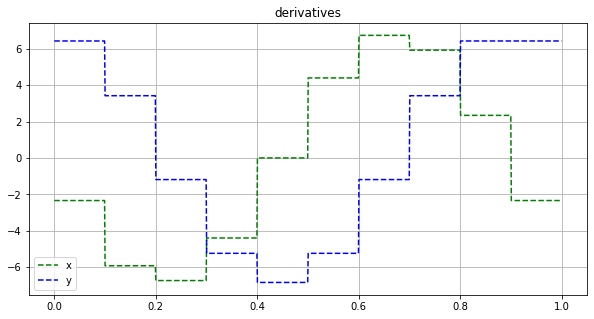

In [10]:
#grafico
plt.figure ( 0 , figsize = ( 10 , 5 ) )
   
#converto in dataframe    
plt.plot(T,arrow[:,0],color="green",label="x",linestyle="--",alpha=1)
plt.plot(T,arrow[:,1],color="blue",label="y",linestyle="--",alpha=1)
plt.legend()
plt.grid(True)
plt.title("derivatives")
plt.show()

## Stiffness Matrix

In [11]:
sm = bs.stiffness_matrix_BEM(k=1.0)
sm

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(7,)","(8,)","(9,)","(10,)"
"(0,)",0.000753+0.000903j,-0.000333+0.001507j,-0.006807+0.001131j,0.000131+0.001501j,-0.006530-0.002450j,-0.011814-0.007152j,-0.004180+0.000777j,0.000719+0.001299j,-0.001233+0.004811j,0.003035-0.001645j,0.001165-0.000027j
"(1,)",-0.000333+0.001507j,0.000176-0.005984j,-0.003871-0.001879j,0.001028+0.002982j,-0.009035-0.003765j,-0.025054-0.024181j,-0.031758-0.015543j,-0.015060-0.002856j,0.006518-0.008444j,0.000040-0.001781j,0.001725-0.000174j
"(2,)",-0.006807+0.001131j,-0.003871-0.001879j,-0.002770+0.002295j,-0.001674-0.001206j,0.002608+0.002414j,-0.016015+0.000294j,-0.030345-0.033544j,-0.018522-0.013652j,-0.007890+0.010565j,-0.001635-0.002057j,-0.000552-0.002814j
"(3,)",0.000131+0.001501j,0.001028+0.002982j,-0.001674-0.001206j,-0.003413-0.004362j,-0.000689+0.006238j,-0.021126+0.003319j,-0.028336-0.008409j,-0.023968-0.031460j,-0.019156-0.014992j,-0.004440+0.005400j,0.001276+0.001899j
"(4,)",-0.006530-0.002450j,-0.009035-0.003765j,0.002608+0.002414j,-0.000689+0.006238j,-0.002837-0.004184j,-0.001774-0.005882j,0.004737+0.002492j,-0.010309-0.004589j,-0.030643-0.027869j,-0.020794-0.021967j,-0.016993+0.006090j
"(5,)",-0.011814-0.007152j,-0.025054-0.024181j,-0.016015+0.000294j,-0.021126+0.003319j,-0.001774-0.005882j,0.004369-0.006154j,0.005580-0.008043j,-0.001299+0.006961j,-0.007965-0.010373j,-0.020960-0.018043j,-0.015793-0.021580j
"(6,)",-0.004180+0.000777j,-0.031758-0.015543j,-0.030345-0.033544j,-0.028336-0.008409j,0.004737+0.002492j,0.005580-0.008043j,0.000145-0.006121j,-0.000311-0.011030j,0.005408+0.002932j,-0.013056+0.002214j,-0.014924-0.001383j
"(7,)",0.000719+0.001299j,-0.015060-0.002856j,-0.018522-0.013652j,-0.023968-0.031460j,-0.010309-0.004589j,-0.001299+0.006961j,-0.000311-0.011030j,0.007725+0.010406j,-0.005015-0.000718j,0.008275+0.000127j,-0.002808-0.005519j
"(8,)",-0.001233+0.004811j,0.006518-0.008444j,-0.007890+0.010565j,-0.019156-0.014992j,-0.030643-0.027869j,-0.007965-0.010373j,0.005408+0.002932j,-0.005015-0.000718j,0.002908-0.003327j,0.002191-0.001887j,-0.000930-0.004880j
"(9,)",0.003035-0.001645j,0.000040-0.001781j,-0.001635-0.002057j,-0.004440+0.005400j,-0.020794-0.021967j,-0.020960-0.018043j,-0.013056+0.002214j,0.008275+0.000127j,0.002191-0.001887j,-0.002073-0.004390j,-0.000569-0.001658j


## Load vector

In [16]:
k_in = np.asarray([1.0,0.0])
I = np.complex(0.1)
def func(xx): # soluzione
    xx = np.asarray(xx)
    theta = np.dot(xx,k_in)
    return np.exp(I*theta)

In [17]:
lv = bs.load_vector_BEM(func)
lv

,cp
"(0,)",(0.24162372207780672+0j)
"(1,)",(0.6800083052971004+0j)
"(2,)",(0.557509786074253+0j)
"(3,)",(0.5763701530132072+0j)
"(4,)",(0.6100298462009961+0j)
"(5,)",(0.7099413303624026+0j)
"(6,)",(0.5626307002508227+0j)
"(7,)",(0.6950534902281504+0j)
"(8,)",(0.6433434471588552+0j)
"(9,)",(0.7719878814601716+0j)


In [19]:
np.absolute(lv)

,cp
"(0,)",0.241624
"(1,)",0.680008
"(2,)",0.55751
"(3,)",0.57637
"(4,)",0.61003
"(5,)",0.709941
"(6,)",0.562631
"(7,)",0.695053
"(8,)",0.643343
"(9,)",0.771988


## Single-layer potential

- scelgo i punti in cui valutare la soluzione
- calcolo il valore della soluzione con $\psi_i$ al posto di $\psi$
- poi modificando $u_{inc}$ varierà $\psi$ ma potrò comunque sfrittare la matrice calcolata

In [52]:
x = np.linspace(0,1,3)
y = np.linspace(2,3,3)
 
xy = np.zeros((len(x),2))
xy[:,0] = x 
xy[:,1] = y
xy

array([[0. , 2. ],
       [0.5, 2.5],
       [1. , 3. ]])

In [54]:
x = np.linspace(0,1,3)
y = np.linspace(2,3,3)
m = np.meshgrid(x,y)
Xx = m[0].flatten()
Xy = m[1].flatten()
XY = np.zeros((len(Xx),2))
XY[:,0] = Xx 
XY[:,1] = Xy
XY

array([[0. , 2. ],
       [0.5, 2. ],
       [1. , 2. ],
       [0. , 2.5],
       [0.5, 2.5],
       [1. , 2.5],
       [0. , 3. ],
       [0.5, 3. ],
       [1. , 3. ]])

In [59]:
pd.DataFrame(XY,index=np.arange(0,len(XY))).index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

In [119]:
self = bs
opts = None
k = 1.0

# single layer potential

# lv : load vector
# XY : valori in cui voglio valutare la funzione
#  k : wave-vector

###
def norm(x):
    return np.sqrt(np.sum(np.power(x,2.0)))        


# variabile di output
# matrice con:
# - righe: punti x dove valutare la soluzione
# - colonne : funzioni di base
#out = pd.DataFrame(index=np.arange(0,len(XY)),columns=lv.index)
outnp = np.zeros(shape=(len(XY),len(lv)),dtype=object)

#giusto per definirlo
x0 = XY[0,:]
# foundamental solution with x fixed
I = np.complex(0,1)
def foundamental_x(y):
    d = np.asarray([ norm(i)  for i in y-x0 ])
    return scipy.special.hankel1(np.full(len(d),0),k*d)*I/4.0 

for i in range(len(XY)):
    x0 = XY[i,:]
    lvx0 = self.load_vector_BEM(foundamental_x,opts)
    outnp[i] = lvx0["cp"]
    
out = pd.DataFrame(data=outnp,index=np.arange(0,len(XY)),columns=lv.index)

In [128]:
out

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)","(6,)","(7,)","(8,)","(9,)","(10,)"
0,(-0.029184923146898786+0.018167432662066368j),(-0.05891613331699982+0.07535079124388126j),(-0.03061547721081953+0.12443172285327841j),(-0.05473460058083852+0.11641102184397105j),(-0.08541589758814622+0.053307885957319806j),(-0.08579203141410252-0.008107605566947536j),(-0.07394211104778191-0.037059261567060575j),(-0.06278716784849767-0.03517137973822874j),(-0.06752917253783976-0.018426595106503463j),(-0.08441578760741024+0.02533980109459045j),(-0.056812722839799504+0.052016694654376854j)
1,(-0.06732847267762482+0.03510137705541762j),(-0.05072727362439482+0.09009962662192485j),(-0.030919764552636037+0.10741259748533753j),(-0.0661623076371335+0.07519575203939627j),(-0.10002658473651788+0.023463036338255333j),(-0.07457746952651521-0.023068349855401182j),(-0.0627736431671753-0.04191786757702365j),(-0.07411380203394305-0.045524917629488126j),(-0.09351772407909441-0.02059455483117527j),(-0.07918281316179296+0.03395017312059834j),(-0.04391175367549398+0.053769112094889285j)
2,(-0.019868524067426854+0.017752730021603283j),(-0.05866103460393211+0.09472578080403844j),(-0.049095492422433454+0.08836579380039457j),(-0.08771658743123642+0.05039511357747616j),(-0.09236198119996408-0.012427736811100178j),(-0.06505101761839589-0.0443420428747512j),(-0.051050495127035536-0.05090216926976979j),(-0.06675003175699246-0.04953490425275068j),(-0.07315207072718379-0.012140254383256648j),(-0.08435468130708815+0.042607717299291664j),(-0.04547535475643089+0.06429320004890027j)
3,(-0.06016749908999321-0.006476939855831983j),(-0.07726884700572483+0.03948978653408217j),(-0.058298084992677926+0.062274948232288j),(-0.07515995760150324+0.05774605796436406j),(-0.09035939731863275+0.0035220692924392265j),(-0.05942957867582089-0.03278297937350205j),(-0.03919129328807068-0.05647307390220433j),(-0.03575945762316465-0.05934328030941066j),(-0.05052296439793863-0.048679065393307304j),(-0.06982947763884127-0.01997047150177976j),(-0.055867367195519574+0.013093374095553362j)
4,(-0.01908454231084226+0.005778494696334804j),(-0.0684990490640001+0.041759933040297986j),(-0.07102211117011148+0.07113957096692136j),(-0.07528803785092354+0.03996036066690073j),(-0.08742508485624784-0.015989395628381843j),(-0.046081142056747376-0.04354956347046157j),(-0.034434192857566666-0.061301805981462516j),(-0.03781830855031008-0.06308644572969417j),(-0.059578093850653276-0.04942254668426253j),(-0.08627136653314808-0.0069162060279513585j),(-0.0538253501373831+0.020329924643083936j)
5,(-0.0649951134964783+0.00397991599304013j),(-0.08157673821040062+0.045632979573747054j),(-0.08059353143423147+0.05425820027843035j),(-0.07448709996319108+0.016079218548721803j),(-0.0683493093992269-0.035934747465566734j),(-0.0386843526667795-0.06162786715959237j),(-0.020616651819810674-0.058795277999534996j),(-0.031988540514122143-0.06314567294217713j),(-0.061024345728752545-0.049999765178321755j),(-0.0730553489356806-0.006259252822094592j),(-0.016324406943186882+0.0023343761398222315j)
6,(-0.020516517748122312-0.010565595417765423j),(-0.08540787509688354-0.005609357231678196j),(-0.09452260980341239+0.031470866656027316j),(-0.08792169219515354+0.015218462560955855j),(-0.07463894737851304-0.03820833127593985j),(-0.03592779083896665-0.06173816142154963j),(-0.00677174510177735-0.06460788569708814j),(-0.0028228038842194455-0.06188854467929241j),(-0.017541069026896935-0.06137317345464538j),(-0.05818026444227133-0.04972726529889841j),(-0.06235771458898624-0.014240874637364438j)
7,(-0.01869028611165775-0.005509805418799584j),(-0.09697253636312682+0.002426421110080396j),(-0.08055414255049032+0.02267650537817143j),(-0.0752076438972828-0.0005424732361081082j),(-0.05856364830356237-0.040613475237490856j),(-0.026032785490653704-0.07230425681429471j),(-0.001138447005867582-0.06628006181996991j),(-0.0009268572780678046-0.060521748736179944j),(-0.023768611938566813-0.06555272388056557j),(-0.06096333321121373-0.044178135583634884j),(-0.062677295476629

In [120]:
lvnp = np.asarray(lv)
outnp = np.asarray(out)

slpnp = np.dot(outnp,lvnp)

#slp = pd.DataFrame(data=slpnp,index=lv.index,columns=["value"])

In [126]:
slp = pd.DataFrame(index=out.index,columns=["x","value"])
slp["x"] = [ i for i in XY]
slp["value"] = slpnp[:,0]
slp

,x,value
0,"[0.0, 2.0]",(-0.41007238254629075+0.18811276607536853j)
1,"[0.5, 2.0]",(-0.43399952840532624+0.13571565887919881j)
2,"[1.0, 2.0]",(-0.4184267930103198+0.07842381077271354j)
3,"[0.0, 2.5]",(-0.3808810690651684-0.04586735802624687j)
4,"[0.5, 2.5]",(-0.3778963050933427-0.06098490359131537j)
5,"[1.0, 2.5]",(-0.359837768181477-0.10782561886756475j)
6,"[0.0, 3.0]",(-0.3076202302133617-0.20630148663552902j)
7,"[0.5, 3.0]",(-0.2848059237750579-0.22003581595990634j)
8,"[1.0, 3.0]",(-0.2538133907440604-0.23296784849394306j)


In [127]:
XY

array([[0. , 2. ],
       [0.5, 2. ],
       [1. , 2. ],
       [0. , 2.5],
       [0.5, 2.5],
       [1. , 2.5],
       [0. , 3. ],
       [0.5, 3. ],
       [1. , 3. ]])

- devo creare delle Bspline periodiche
- l'ultimo control points non deve essere accessibile
- devo modificare le funzioni di approssimazione
- devo togliere dalle matrici le righe che corrispondono ai dof periodici dopo aver sommato il loro contributo agli altri dof
- sistemare solo la funzione approximate per adesso

- approximate
- edge
- Dirichlet_BC
- Galerkin

cioè solo le funzioni che vanno a modificare i control points della Bspline

# Hankel and Bessel functions

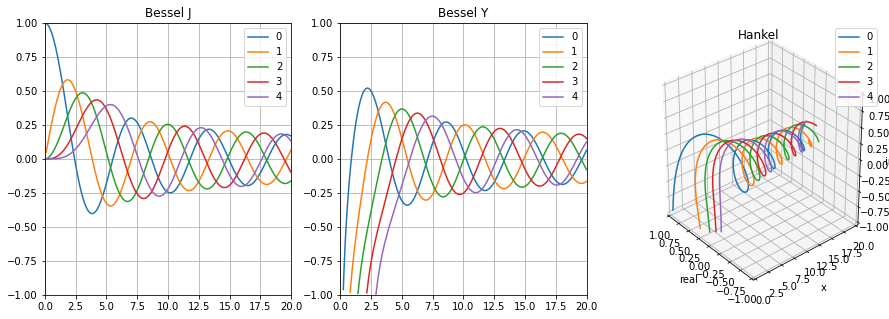

In [2]:
#
orders = [0,1,2,3,4]
t  = np.linspace(0.1,20,1000)

#
fig = plt.figure ( 0 , figsize = ( 15 , 5 ) )

#
ax = fig.add_subplot(131)  
for i in orders:
    B1 = scipy.special.jv(i,t)
    B1[B1<-1] = np.nan
    ax.plot(t, B1 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel J")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(132)  
for i in orders:
    B2 = scipy.special.yv(i,t)    
    B2[B2<-1] = np.nan
    ax.plot(t, B2 ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Bessel Y")
ax.set_ylim(-1,1)
ax.set_xlim(0,20)
plt.grid(True)
plt.legend()

#
ax = fig.add_subplot(133, projection='3d')  
for i in orders:
    H  = scipy.special.hankel1(i,t)
    Hr = H.real
    Hi = H.imag
    Hr[Hr<-1] = np.nan
    Hi[Hi<-1] = np.nan
    ax.plot(Hr, t, Hi ,label=str(i))#, cmap='Blues',alpha=1)
ax.set_title("Hankel")
ax.set_xlim3d(-1,1)
ax.set_ylim3d(0,20)
ax.set_zlim3d(-1,1)
ax.set_xlabel( "real" )
ax.set_ylabel( "x" )
ax.set_zlabel( "imag" )
ax.invert_xaxis()
ax.view_init(elev=30, azim=-40)
plt.grid(True)
plt.legend()


#h = scipy.special.jv(i,t) + I*scipy.special.yv(i,t)
#H = scipy.special.hankel1(i,t)
#np.nanmean(np.absolute(h-H))

plt.show()